In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
'''
import pandas as pd : csv file을 읽을 때 사용
import matplotlib.pyplot as plt
import seaborn as sns : 그래프 그릴 때 사용
from sklearn.model_selection import train_test_split : sklearn은 머신러닝을 도와주는 패키지로 그 안에 train_test_split는 training, test set을 분리해주는 class
'''

'\nimport pandas as pd : csv file을 읽을 때 사용\nimport matplotlib.pyplot as plt\nimport seaborn as sns : 그래프 그릴 때 사용\nfrom sklearn.model_selection import train_test_split : sklearn은 머신러닝을 도와주는 패키지로 그 안에 train_test_split는 training, test set을 분리해주는 class\n'

In [7]:
df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
df.head(200)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
print(df.shape)

(200, 4)


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


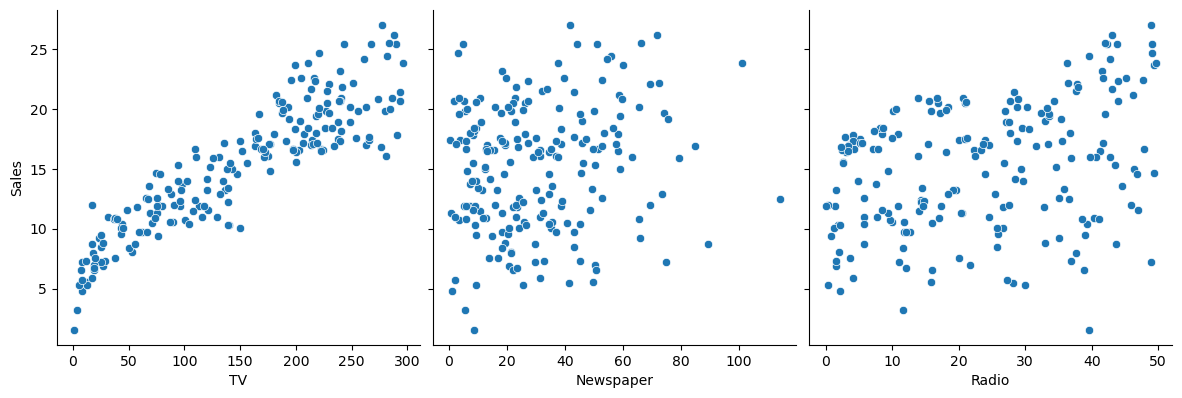

In [9]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars=['Sales'], height=4 )


In [10]:
x_data = np.array(df[['TV']], dtype=np.float32)
y_data = np.array(df['Sales'], dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

x_data = x_data.reshape((-1, 1))
y_data = y_data.reshape((-1, 1))

print(x_data.shape)
print(y_data.shape)

(200, 1)
(200,)
(200, 1)
(200, 1)


In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(160, 1) (40, 1)
(160, 1) (40, 1)


In [13]:
model = Sequential([
  Dense(1)
])

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=1000 # epochs 복수형으로 쓰기!
)

Epoch 1/1000
5/5 [==============================] - 1s 63ms/step - loss: 41986.2500 - val_loss: 45641.0312
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 41651.2422 - val_loss: 45269.8984
Epoch 3/1000
5/5 [==============================] - 0s 9ms/step - loss: 41316.5508 - val_loss: 44898.1562
Epoch 4/1000
5/5 [==============================] - 0s 9ms/step - loss: 40973.0391 - val_loss: 44529.6250
Epoch 5/1000
5/5 [==============================] - 0s 9ms/step - loss: 40649.1758 - val_loss: 44159.7578
Epoch 6/1000
5/5 [==============================] - 0s 9ms/step - loss: 40298.8008 - val_loss: 43797.7305
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 39971.9141 - val_loss: 43435.3164
Epoch 8/1000
5/5 [==============================] - 0s 9ms/step - loss: 39644.3906 - val_loss: 43074.0312
Epoch 9/1000
5/5 [==============================] - 0s 9ms/step - loss: 39316.3867 - val_loss: 42714.5859
Epoch 10/1000
5/5 [=========================

2/2 [==============================] - 0s 4ms/step


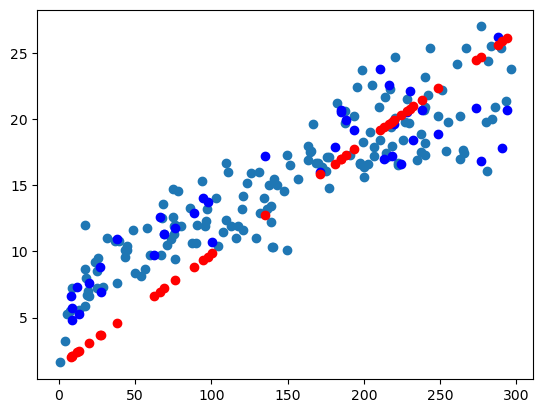

In [14]:
y_pred = model.predict(x_val)
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val, color='b')
plt.scatter(x_val, y_pred, color='r')
plt.show()